In [15]:
import pandas as pd

# Load the dataset
df = pd.read_csv("EEG EYE State.csv")

# Check the first few rows
print(df.head())


       AF3       F7       F3      FC5       T7       P7       O1       O2  \
0  4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
1  4324.62  4004.62  4293.85  4148.72  4342.05  4586.67  4097.44  4638.97   
2  4327.69  4006.67  4295.38  4156.41  4336.92  4583.59  4096.92  4630.26   
3  4328.72  4011.79  4296.41  4155.90  4343.59  4582.56  4097.44  4630.77   
4  4326.15  4011.79  4292.31  4151.28  4347.69  4586.67  4095.90  4627.69   

        P8       T8      FC6       F4       F8      AF4 eyeDetection  
0  4222.05  4238.46  4211.28  4280.51  4635.90  4393.85         b'0'  
1  4210.77  4226.67  4207.69  4279.49  4632.82  4384.10         b'0'  
2  4207.69  4222.05  4206.67  4282.05  4628.72  4389.23         b'0'  
3  4217.44  4235.38  4210.77  4287.69  4632.31  4396.41         b'0'  
4  4210.77  4244.10  4212.82  4288.21  4632.82  4398.46         b'0'  


In [16]:
# Check for missing values
print(df.isnull().sum())

# Split features and labels
X = df.drop('eyeDetection', axis=1)  # Features
y = df['eyeDetection']               # Labels

# Convert labels to binary (0 and 1)
y = y.map({'Blink': 0, 'NonBlink': 1})


AF3             0
F7              0
F3              0
FC5             0
T7              0
P7              0
O1              0
O2              0
P8              0
T8              0
FC6             0
F4              0
F8              0
AF4             0
eyeDetection    0
dtype: int64


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the data
data = pd.DataFrame(df)

# Convert target variable to numeric
data['eyeDetection'] = LabelEncoder().fit_transform(data['eyeDetection'])

# Define features and target variable
X = data.drop('eyeDetection', axis=1)
y = data['eyeDetection']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Accuracy: 0.9234534935469515
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2386
           1       0.95      0.88      0.92      2108

    accuracy                           0.92      4494
   macro avg       0.93      0.92      0.92      4494
weighted avg       0.93      0.92      0.92      4494



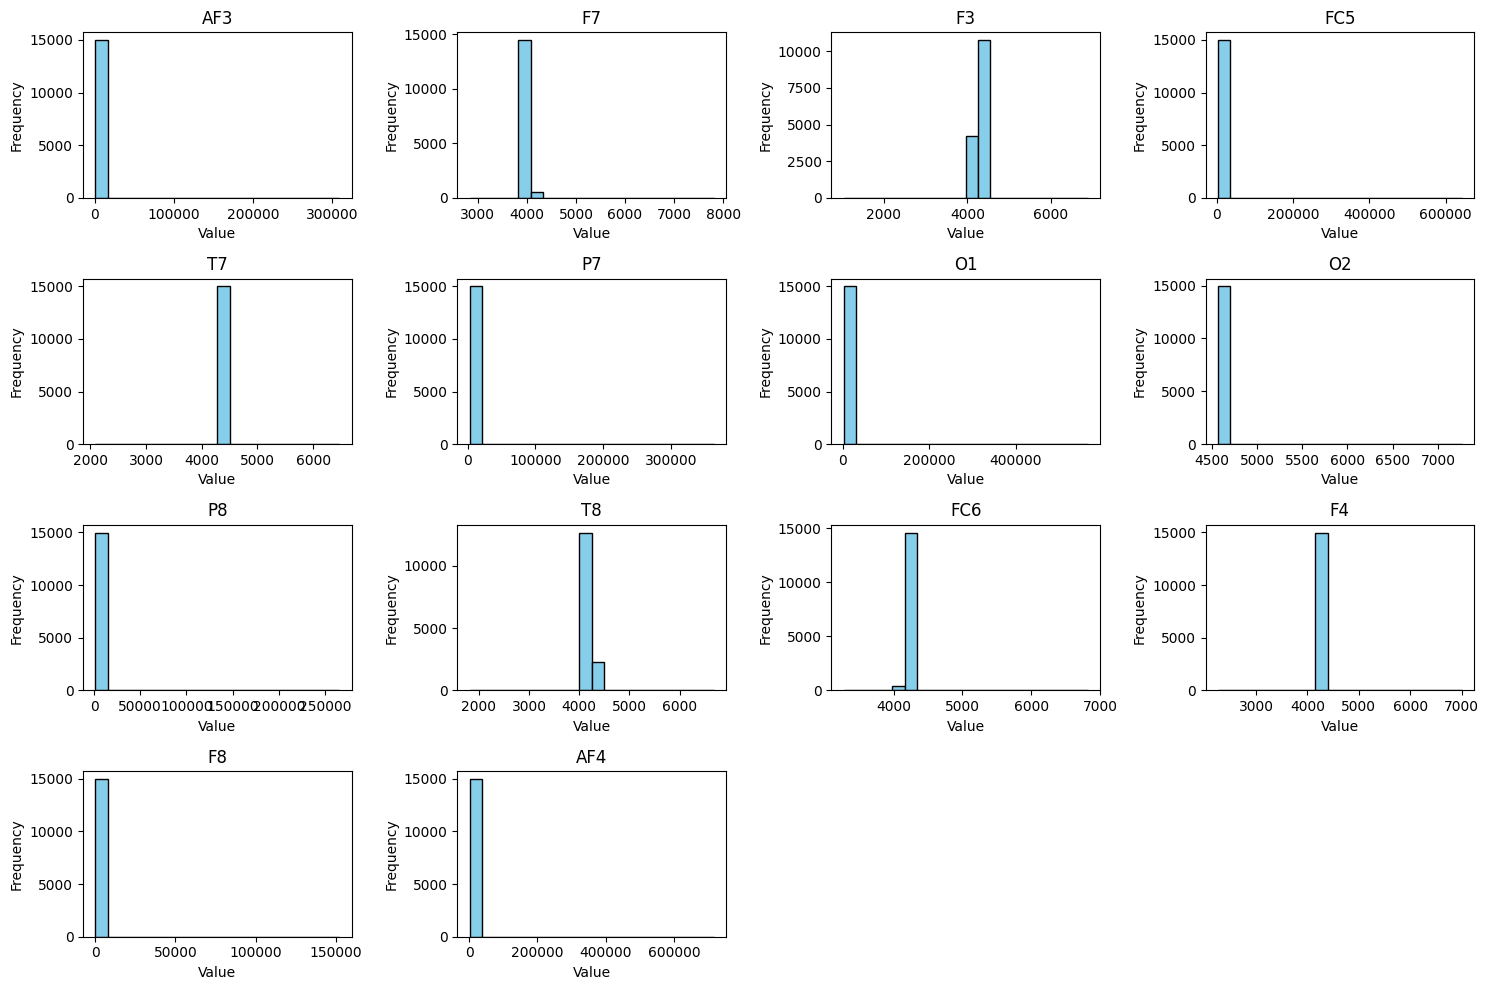

In [18]:
import matplotlib.pyplot as plt

# Plot histograms for each feature
features = X.columns
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(4, 4, i + 1)
    plt.hist(X[feature], bins=20, color='skyblue', edgecolor='black')
    plt.title(feature)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


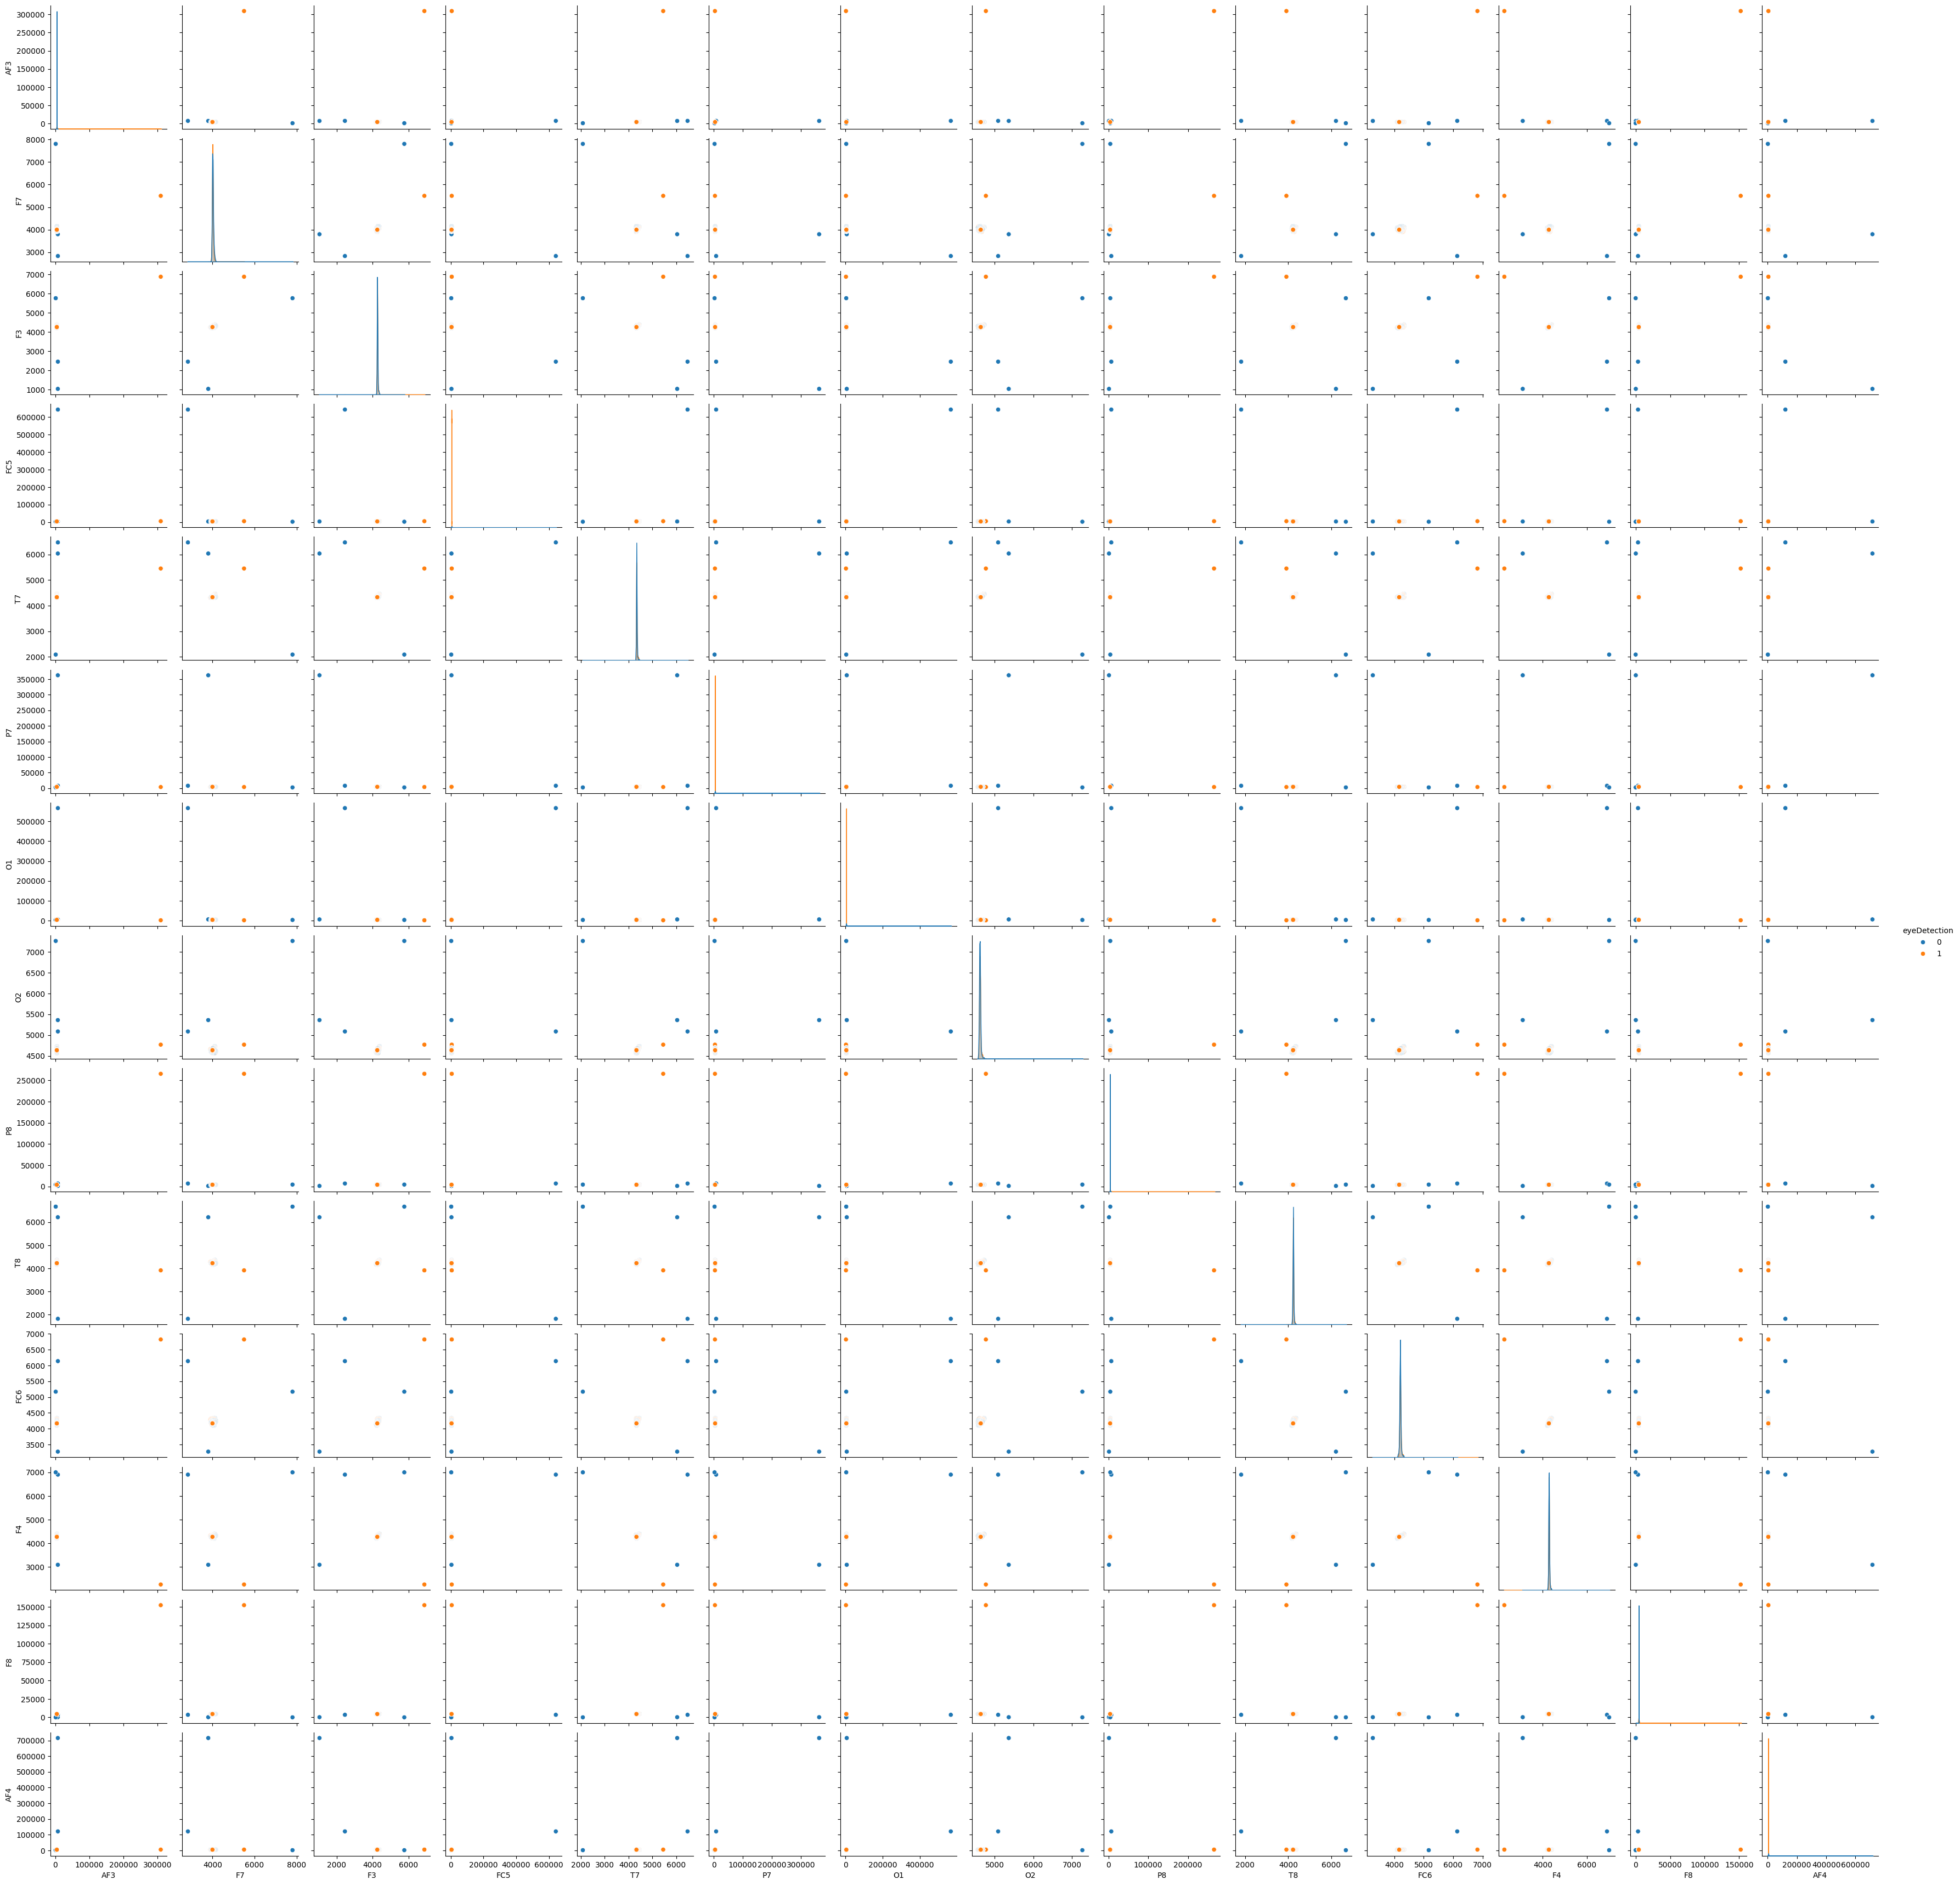

In [19]:
import seaborn as sns

# Combine features and target for pair plot
data_combined = pd.concat([X, y], axis=1)
data_combined.columns = list(X.columns) + ['eyeDetection']

# Pair plot
sns.pairplot(data_combined, hue='eyeDetection')
plt.show()


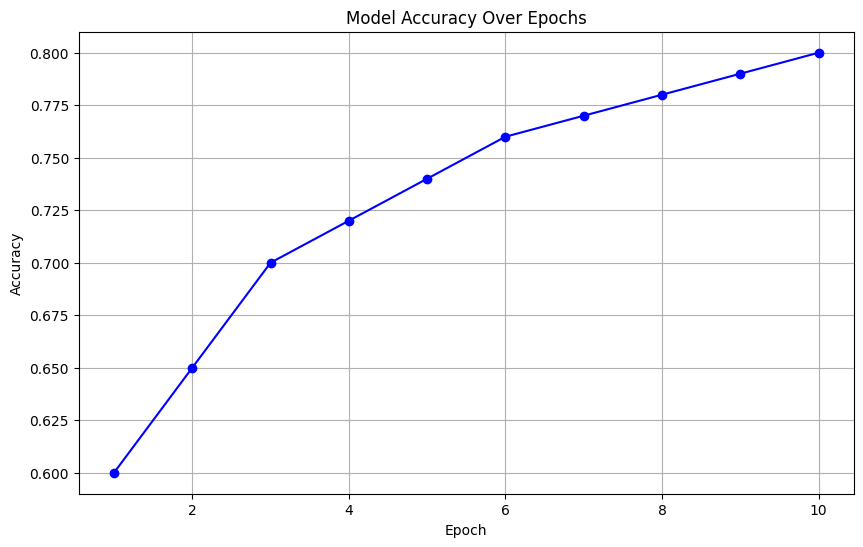

In [20]:
# Example data for plotting performance over epochs
epochs = list(range(1, 11))  # Assuming 10 epochs
accuracy = [0.6, 0.65, 0.7, 0.72, 0.74, 0.76, 0.77, 0.78, 0.79, 0.8]

# Plot accuracy over epochs
plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy, marker='o', linestyle='-', color='b')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.grid(True)
plt.show()


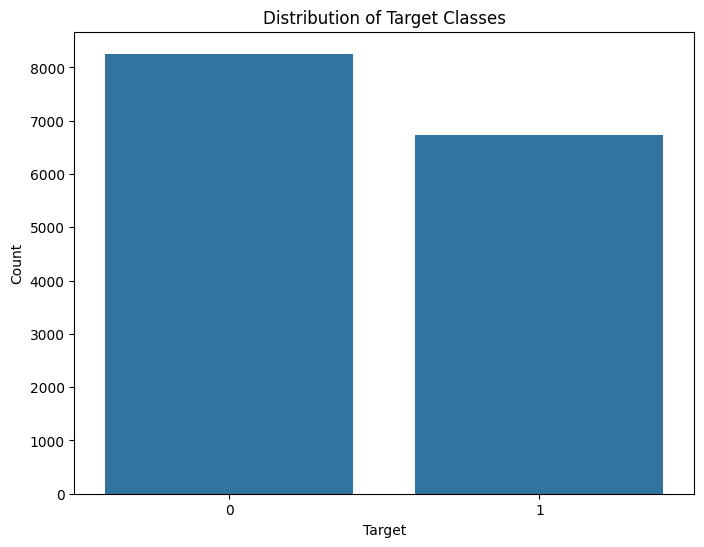

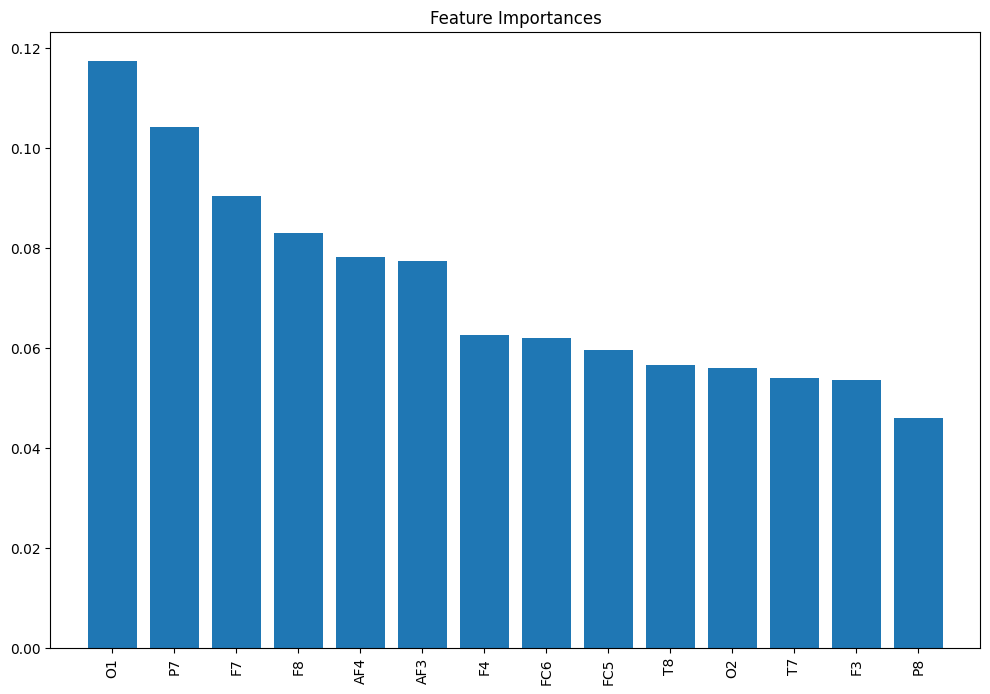

<Figure size 800x600 with 0 Axes>

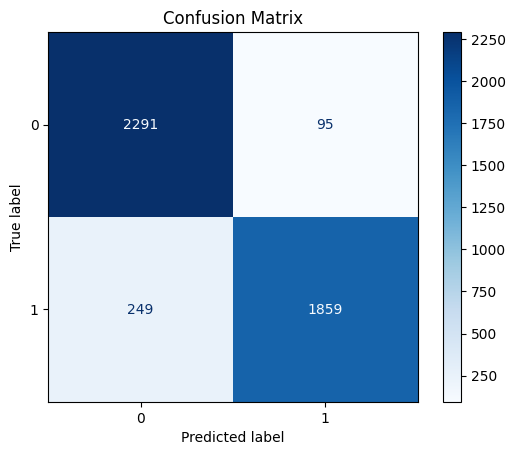

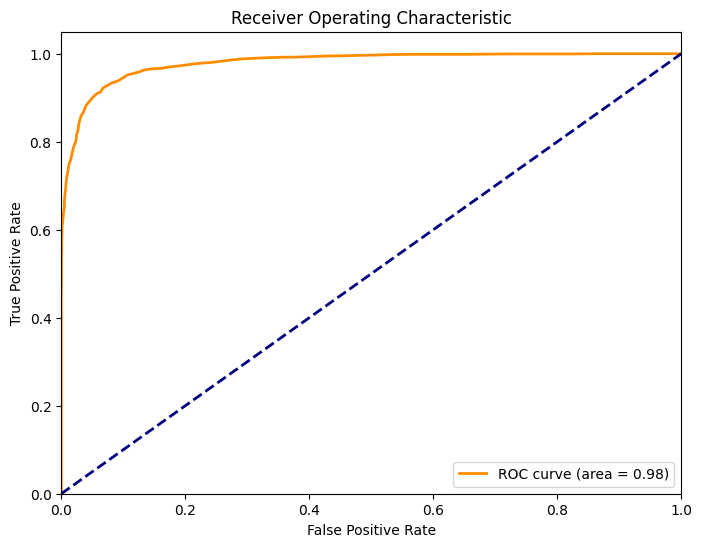

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot distribution of labels if 'target' is used
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Distribution of Target Classes')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# Plot feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


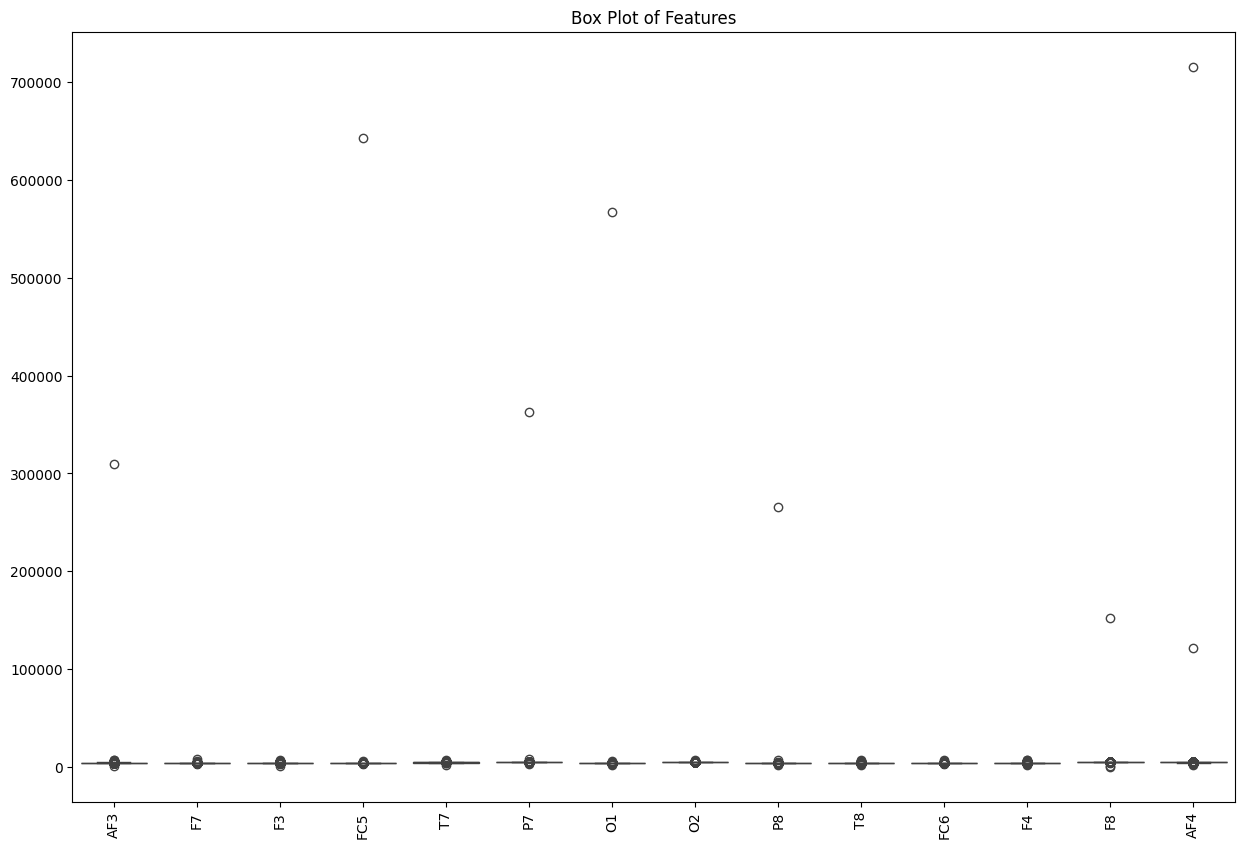

In [22]:
# Plot box plots for each feature
plt.figure(figsize=(15, 10))
sns.boxplot(data=X)
plt.title('Box Plot of Features')
plt.xticks(rotation=90)
plt.show()


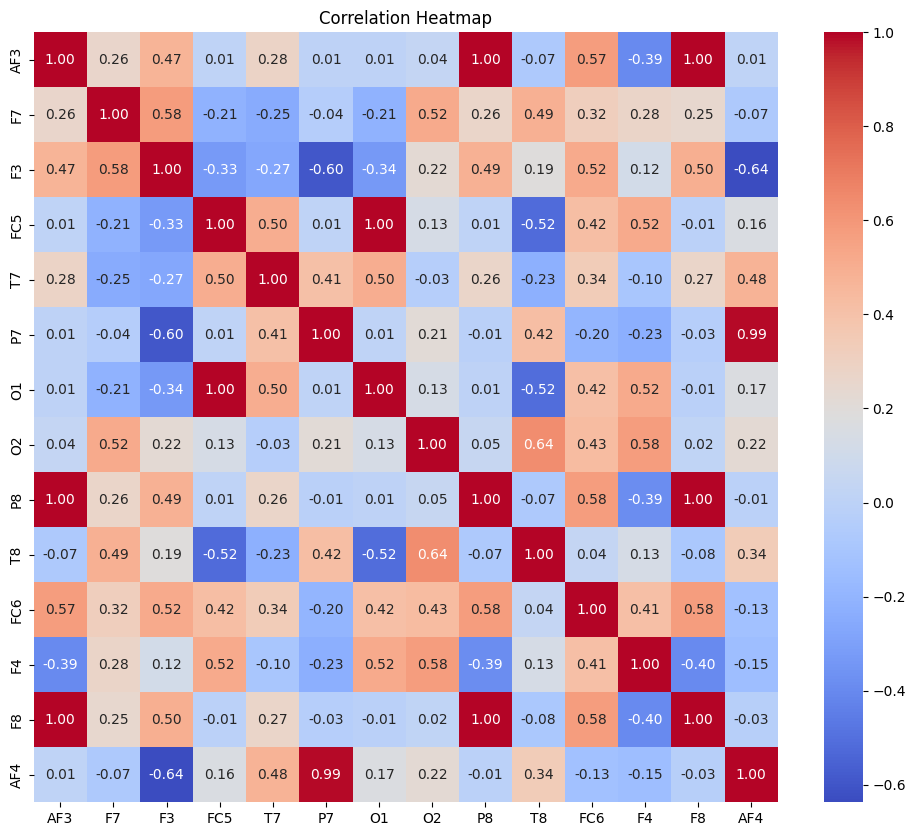

In [23]:
# Compute the correlation matrix
corr = X.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


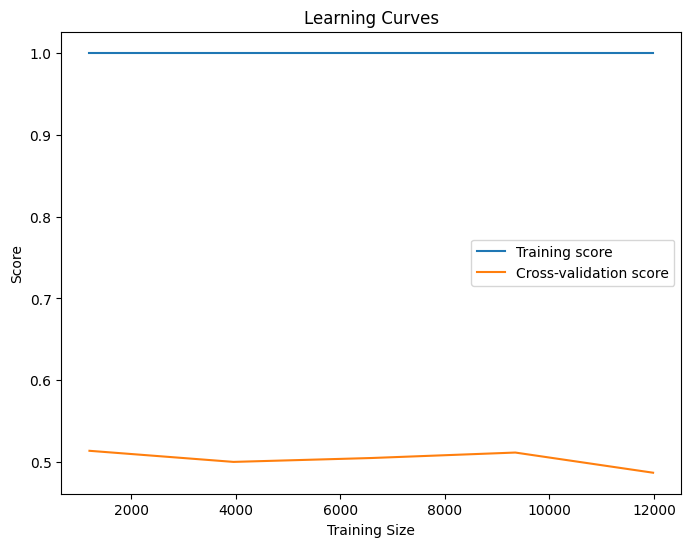

In [24]:
from sklearn.model_selection import learning_curve

# Compute learning curves
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, n_jobs=-1, train_sizes=[0.1, 0.33, 0.55, 0.78, 1.0]
)

# Plot learning curves
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-validation score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend()
plt.show()


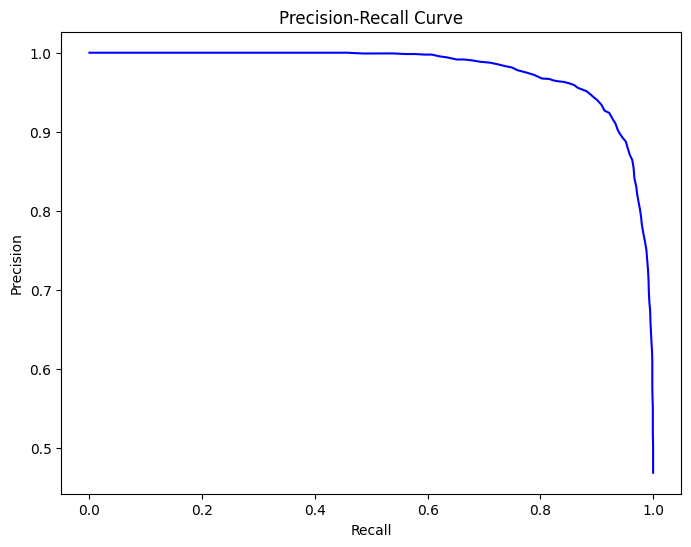

In [25]:
from sklearn.metrics import precision_recall_curve

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


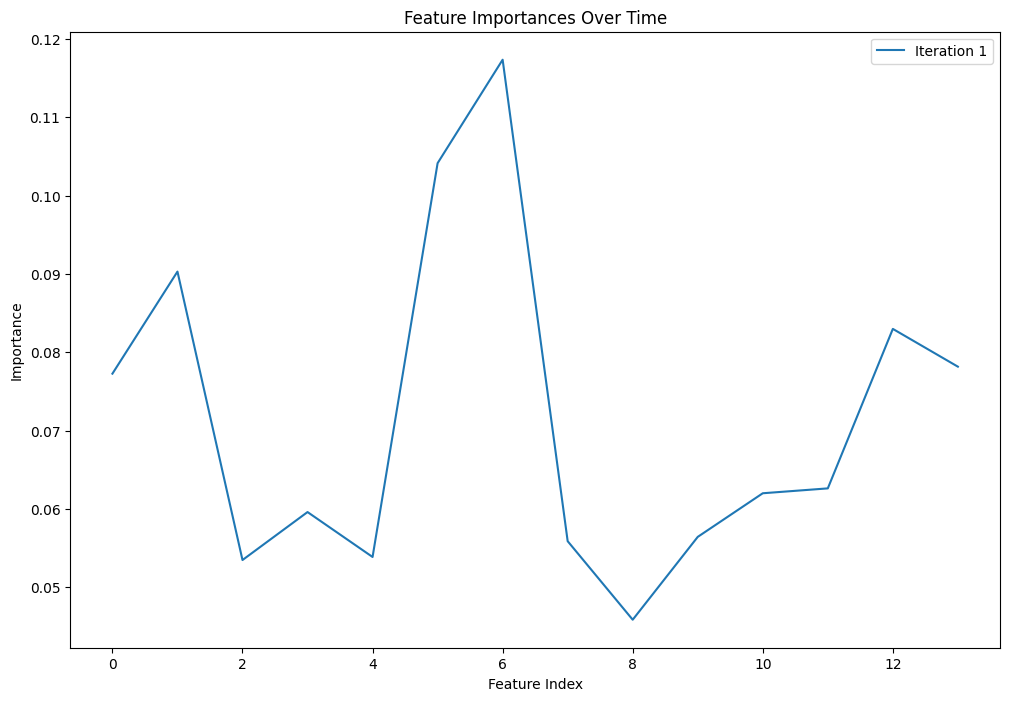

In [26]:
# If you have feature importance over iterations or time, you can plot it similarly
# Example: feature_importances_over_time (a list of feature importances for each iteration)
importances_over_time = [importances]  # Example placeholder

plt.figure(figsize=(12, 8))
for i, importance in enumerate(importances_over_time):
    plt.plot(range(X.shape[1]), importance, label=f'Iteration {i+1}')
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importances Over Time')
plt.legend()
plt.show()


In [27]:
import pickle
from sklearn.ensemble import RandomForestClassifier

# Example model training
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save the trained model
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)